In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

In [5]:
data=pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [6]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [7]:
pd.crosstab(data.HvyAlcoholConsump, data.Diabetes_binary)

Diabetes_binary,0.0,1.0
HvyAlcoholConsump,,
0.0,33158,34514
1.0,2188,832


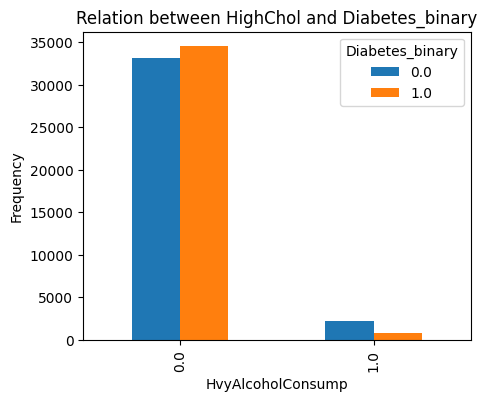

In [8]:
pd.crosstab(data.HvyAlcoholConsump, data.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Relation between HighChol and Diabetes_binary')
plt.xlabel("HvyAlcoholConsump")
plt.ylabel('Frequency')
plt.show()

In [9]:
(data.groupby(["Smoker" , "HvyAlcoholConsump"])["Diabetes_binary"].value_counts()/data.groupby(["Smoker" , "HvyAlcoholConsump"])["Diabetes_binary"].count())*100


Smoker  HvyAlcoholConsump  Diabetes_binary
0.0     0.0                0.0                53.373076
                           1.0                46.626924
        1.0                0.0                79.300292
                           1.0                20.699708
1.0     0.0                1.0                55.993925
                           0.0                44.006075
        1.0                0.0                68.910095
                           1.0                31.089905
dtype: float64

Text(0.5, 1.0, 'Relation b/w Smoker ,HvyAlcoholConsump and Diabetes')

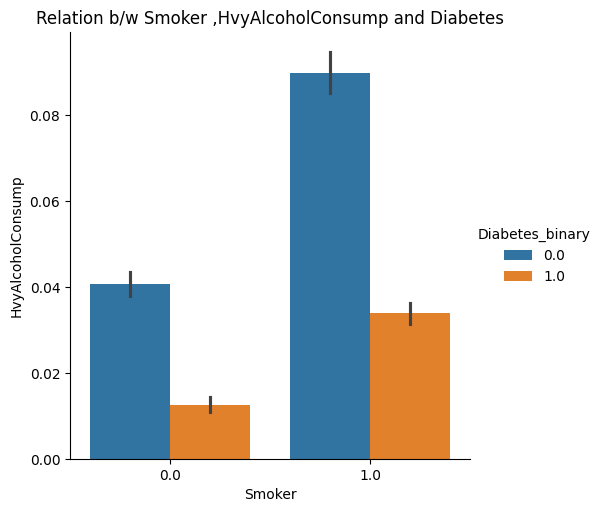

In [10]:

sns.catplot(x="Smoker" , y ="HvyAlcoholConsump" , data = data , hue="Diabetes_binary"  , kind="bar"  );
plt.title("Relation b/w Smoker ,HvyAlcoholConsump and Diabetes")

In [11]:
(data.groupby(["Stroke" , "HeartDiseaseorAttack"])["Diabetes_binary"].value_counts()/data.groupby(["Stroke" , "HeartDiseaseorAttack"])["Diabetes_binary"].count())*100

Stroke  HeartDiseaseorAttack  Diabetes_binary
0.0     0.0                   0.0                55.340444
                              1.0                44.659556
        1.0                   1.0                73.904807
                              0.0                26.095193
1.0     0.0                   1.0                68.227425
                              0.0                31.772575
        1.0                   1.0                81.677484
                              0.0                18.322516
dtype: float64

Text(0.5, 1.0, 'Relation b/w Stroke ,HeartDiseaseorAttack and Diabetes')

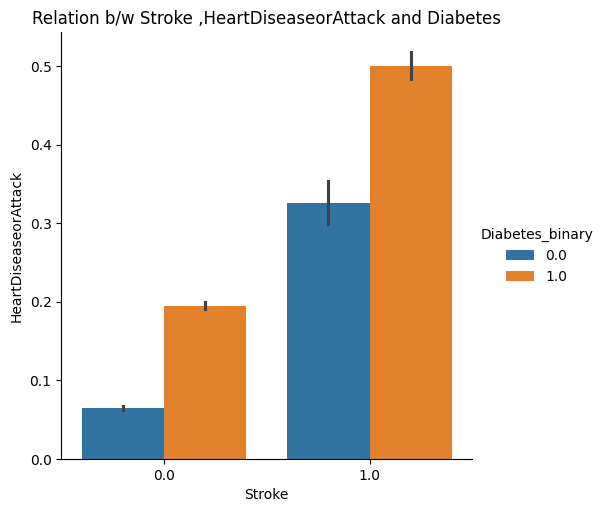

In [12]:
sns.catplot(x="Stroke" , y ="HeartDiseaseorAttack" , data = data , hue="Diabetes_binary"  , kind="bar"  );
plt.title("Relation b/w Stroke ,HeartDiseaseorAttack and Diabetes")

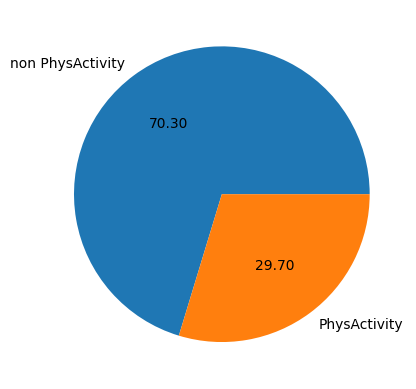

In [13]:
labels=["non PhysActivity","PhysActivity"]

plt.pie(data["PhysActivity"].value_counts() , labels =labels ,autopct='%.02f' );

In [14]:
pd.crosstab(data.PhysActivity, data.Diabetes_binary)

Diabetes_binary,0.0,1.0
PhysActivity,,
0.0,7934,13059
1.0,27412,22287


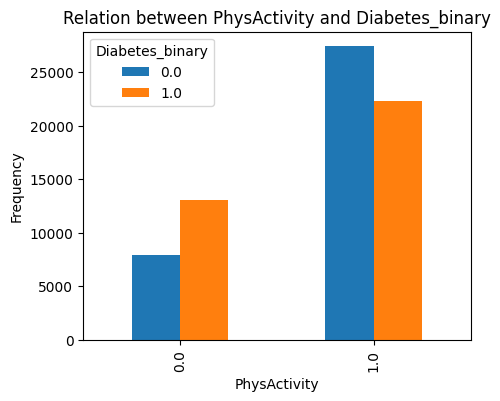

In [15]:
pd.crosstab(data.PhysActivity, data.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Relation between PhysActivity and Diabetes_binary')
plt.xlabel("PhysActivity")
plt.ylabel('Frequency')
plt.show()

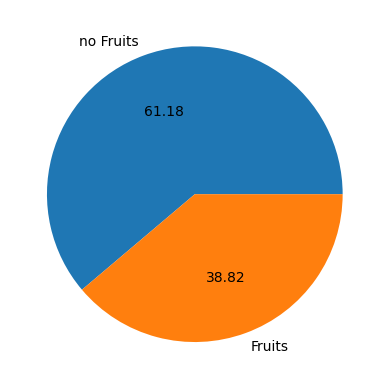

In [16]:
labels=["no Fruits","Fruits"]

plt.pie(data["Fruits"].value_counts() , labels =labels ,autopct='%.02f' );

In [17]:
pd.crosstab(data.Fruits, data.Diabetes_binary)

Diabetes_binary,0.0,1.0
Fruits,,
0.0,12790,14653
1.0,22556,20693


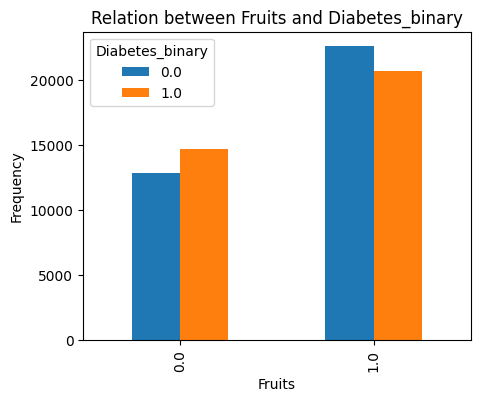

In [18]:
pd.crosstab(data.Fruits, data.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Relation between Fruits and Diabetes_binary')
plt.xlabel("Fruits")
plt.ylabel('Frequency')
plt.show()

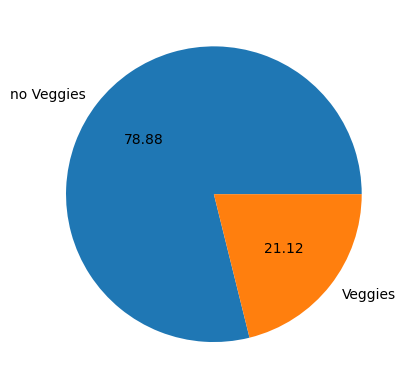

In [20]:
labels=["no Veggies","Veggies"]

plt.pie(data["Veggies"].value_counts() , labels =labels ,autopct='%.02f' );

In [21]:
pd.crosstab(data.Veggies, data.Diabetes_binary)

Diabetes_binary,0.0,1.0
Veggies,,
0.0,6322,8610
1.0,29024,26736


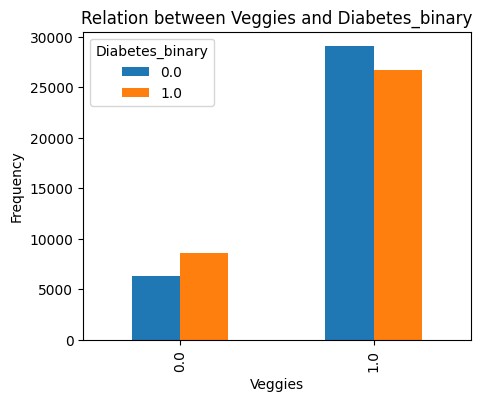

In [22]:
pd.crosstab(data.Veggies, data.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Relation between Veggies and Diabetes_binary')
plt.xlabel("Veggies")
plt.ylabel('Frequency')
plt.show()

In [23]:
pd.crosstab(data.GenHlth, data.Diabetes_binary)

Diabetes_binary,0.0,1.0
GenHlth,,
1.0,7142,1140
2.0,13491,6381
3.0,9970,13457
4.0,3513,9790
5.0,1230,4578


Text(0.5, 1.0, 'Relation b/w GenHlth and Diabetes')

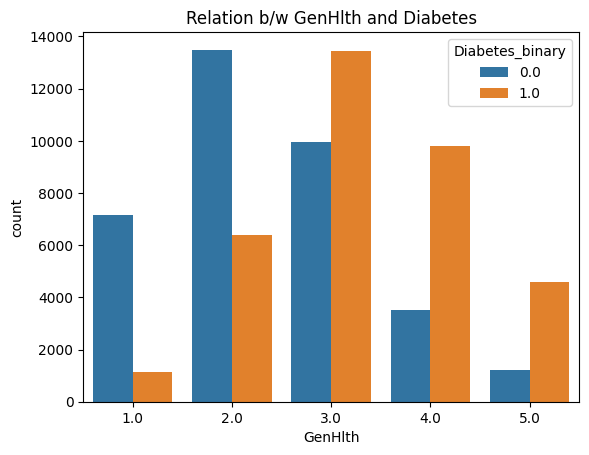

In [26]:
sns.countplot(x="GenHlth" , data=data ,  hue="Diabetes_binary")
plt.title("Relation b/w GenHlth and Diabetes")

In [27]:
pd.crosstab(data.MentHlth, data.Diabetes_binary).T

MentHlth,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
Diabetes_binary,,,,,,,,,,,,,,,,,,,,,
0.0,24688,1239,1759,1043,492,1296,124,420,88,15,...,36,11,5,4,152,10,5,42,23,1552
1.0,23403,812,1508,924,489,1223,164,405,110,13,...,48,11,8,6,273,7,12,57,30,2768


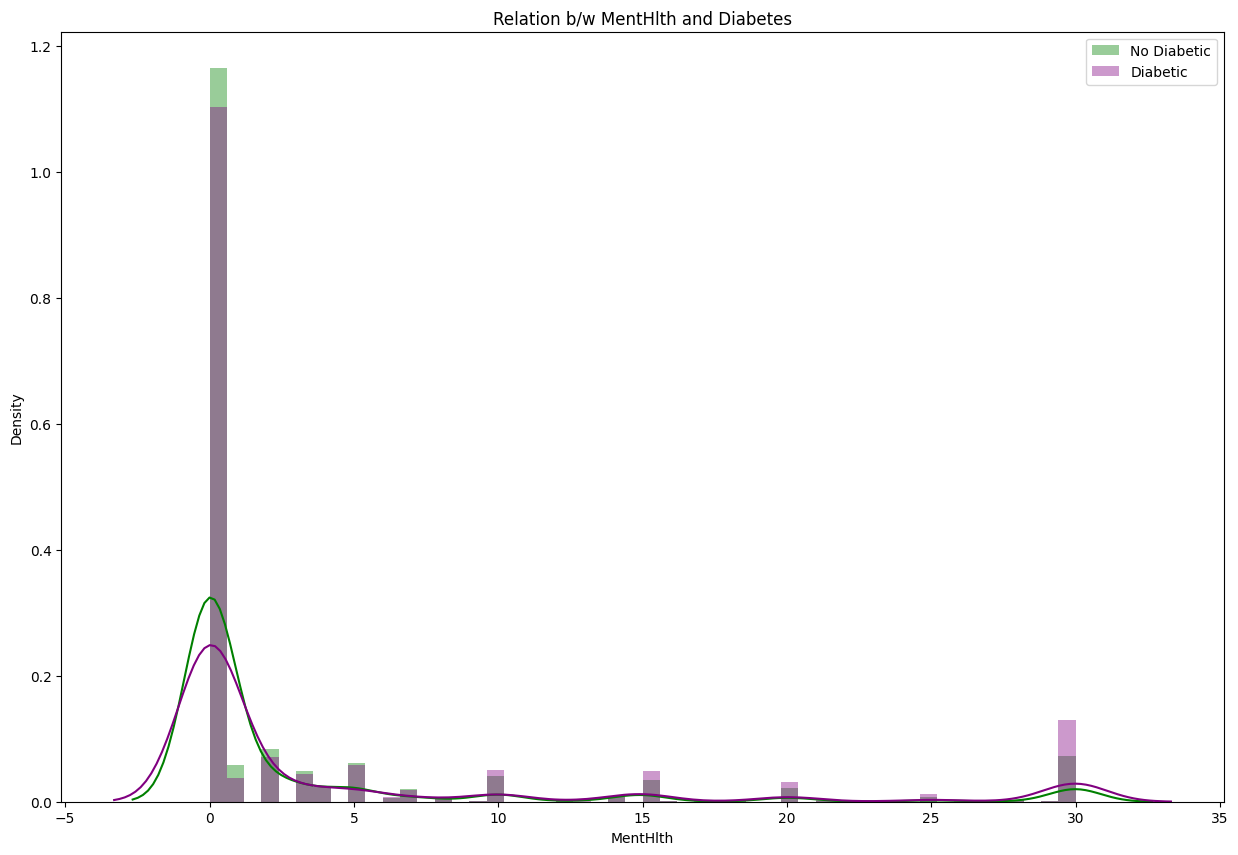

In [29]:
import warnings
plt.figure(figsize=(15, 10))
warnings.filterwarnings('ignore')

sns.distplot(data.MentHlth[data.Diabetes_binary == 0], color="green", label="No Diabetic" )
sns.distplot(data.MentHlth[data.Diabetes_binary == 1], color="purple", label="Diabetic" )
plt.title("Relation b/w MentHlth and Diabetes")

plt.legend()

In [30]:
pd.crosstab(data.PhysHlth, data.Diabetes_binary).T

PhysHlth,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
Diabetes_binary,,,,,,,,,,,,,,,,,,,,,
0.0,23175,1665,2074,1149,613,1018,165,583,117,19,...,90,8,11,9,163,4,13,68,21,2227
1.0,16740,1188,2028,1289,763,1314,282,743,159,36,...,139,23,16,15,394,22,21,143,74,5726


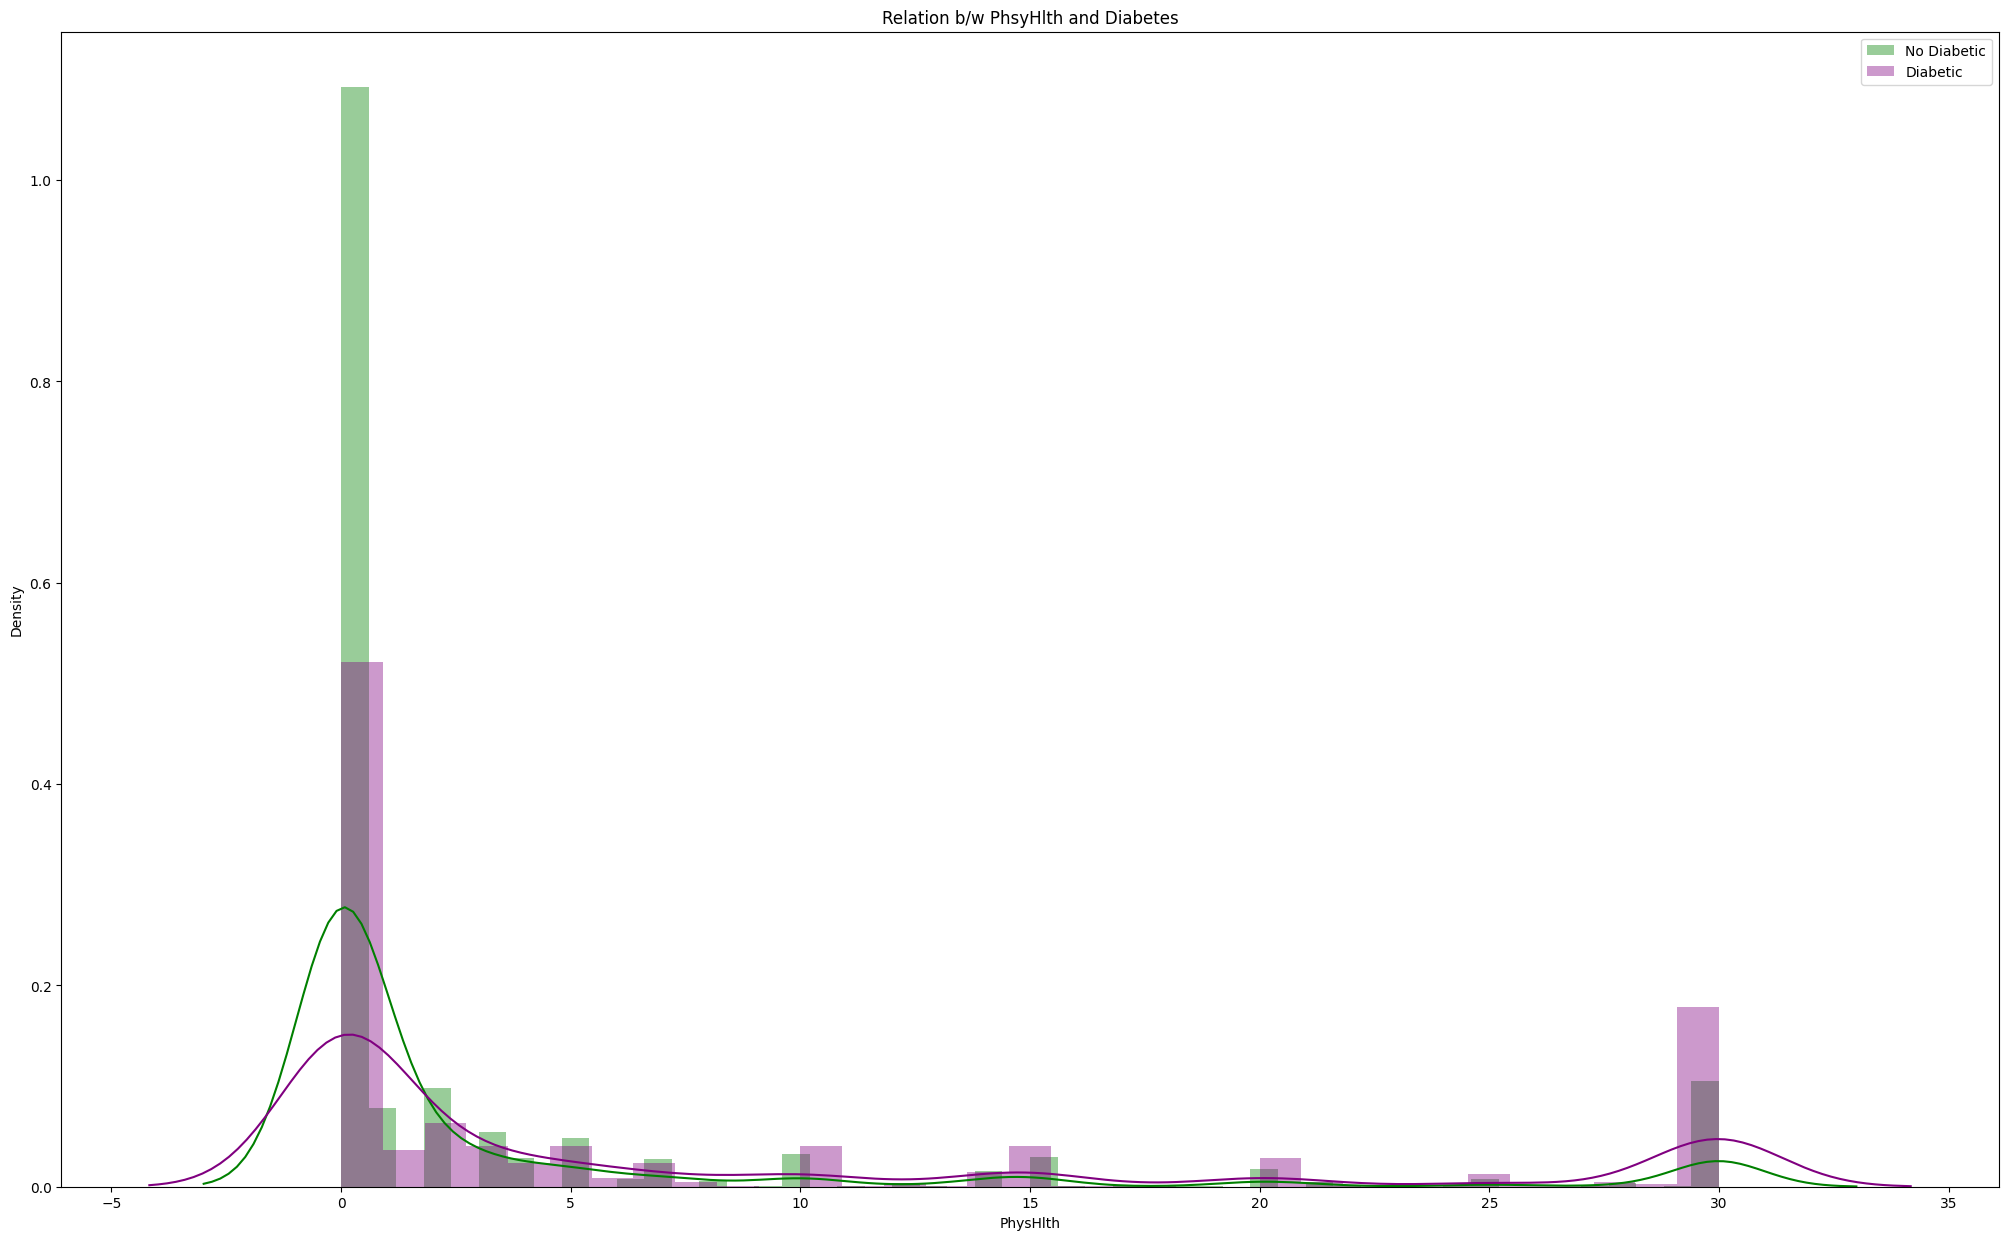

In [31]:
plt.figure(figsize=(25, 15))
warnings.filterwarnings('ignore')

sns.distplot(data.PhysHlth[data.Diabetes_binary == 0], color="green", label="No Diabetic" )
sns.distplot(data.PhysHlth[data.Diabetes_binary == 1], color="purple", label="Diabetic" )
plt.title("Relation b/w PhsyHlth and Diabetes")

plt.legend()

In [32]:
pd.crosstab(data.DiffWalk, data.Diabetes_binary).T

DiffWalk,0.0,1.0
Diabetes_binary,,
0.0,30601,4745
1.0,22225,13121


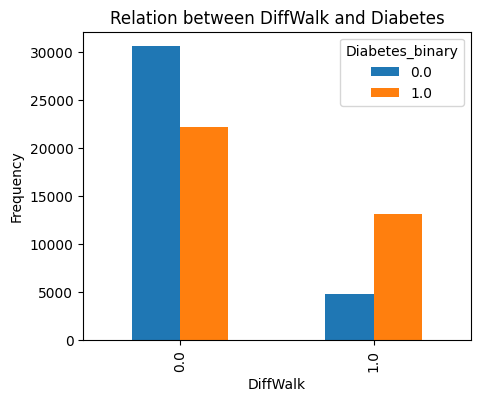

In [33]:
pd.crosstab(data.DiffWalk, data.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Relation between DiffWalk and Diabetes')
plt.xlabel("DiffWalk")
plt.ylabel('Frequency')
plt.show()

In [34]:
pd.crosstab(data.Sex, data.Diabetes_binary)

Diabetes_binary,0.0,1.0
Sex,,
0.0,19975,18411
1.0,15371,16935


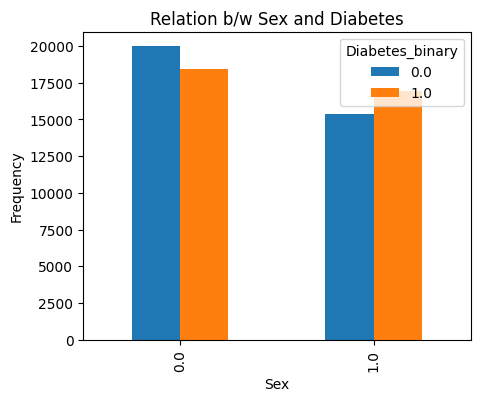

In [35]:
pd.crosstab(data.Sex, data.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Relation b/w Sex and Diabetes')
plt.xlabel("Sex")
plt.ylabel('Frequency')
plt.show()

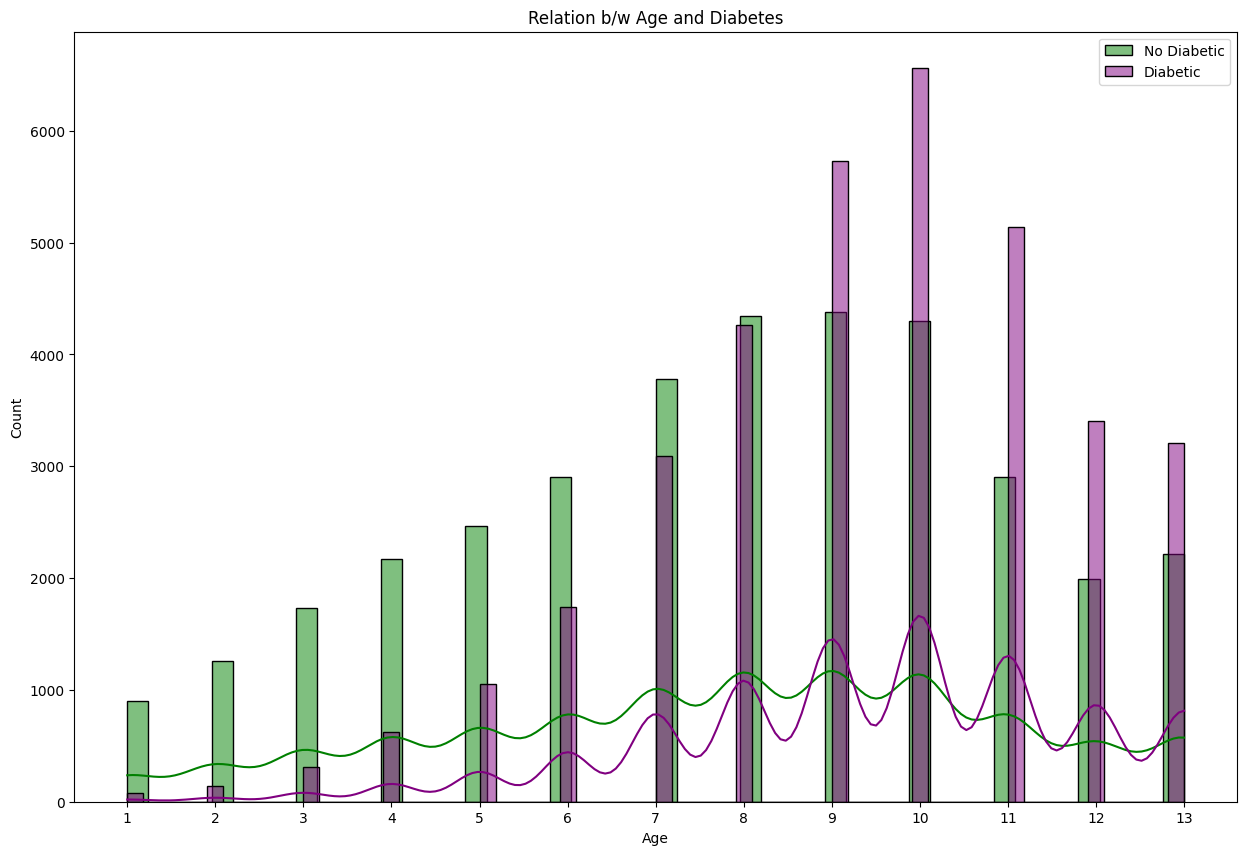

In [36]:
plt.figure(figsize=(15, 10))
sns.histplot(data.Age[data.Diabetes_binary == 0], color="green", label="No Diabetic" , kde = True )
sns.histplot(data.Age[data.Diabetes_binary == 1], color="purple", label="Diabetic" , kde = True )
plt.title("Relation b/w Age and Diabetes")

plt.xticks(data["Age"].unique())
plt.legend()

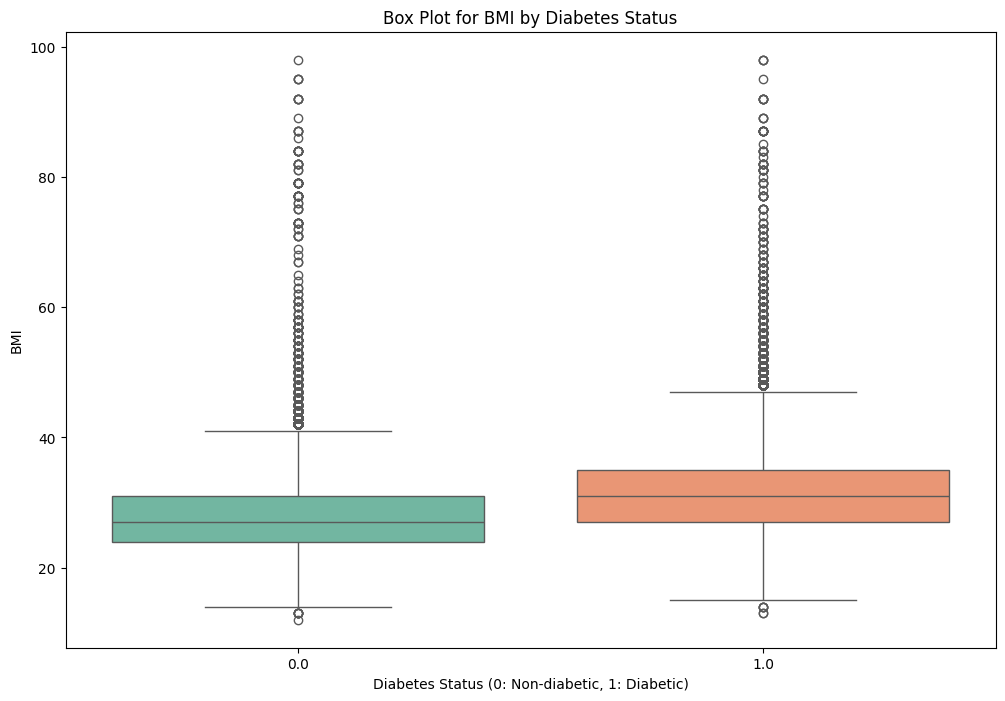

In [37]:
url = "https://raw.githubusercontent.com/kuchbhi-kunal/nidan/main/diabetes_binary_5050split_health_indicators_BRFSS2015.csv"
df = pd.read_csv(url)

# Set the figure size
plt.figure(figsize=(12, 8))

# Box plot for BMI by Diabetes Status
sns.boxplot(x='Diabetes_binary', y='BMI', data=df, palette='Set2')

# Set plot title and labels
plt.title('Box Plot for BMI by Diabetes Status')
plt.xlabel('Diabetes Status (0: Non-diabetic, 1: Diabetic)')
plt.ylabel('BMI')

# Show the plot
plt.show()

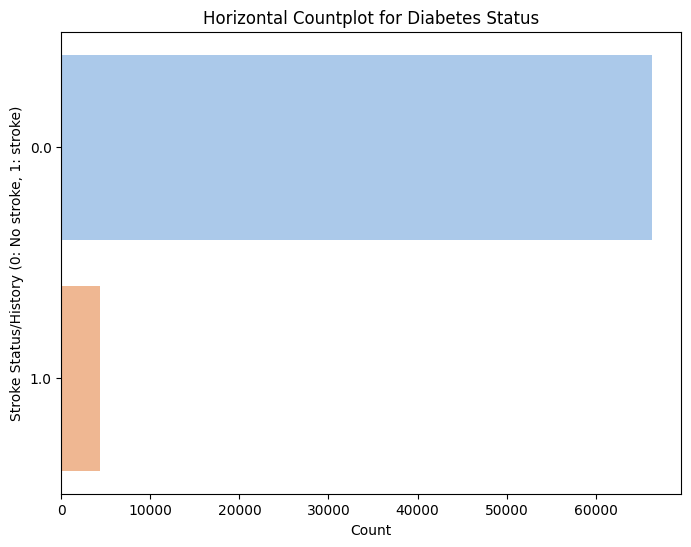

In [38]:
plt.figure(figsize=(8, 6))

# Horizontal Countplot for Diabetes_binary
sns.countplot(y='Stroke', data=df, palette='pastel')

# Set plot title and labels
plt.title('Horizontal Countplot for Diabetes Status')
plt.xlabel('Count')
plt.ylabel('Stroke Status/History (0: No stroke, 1: stroke)')

# Show the plot
plt.show()